In [1]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D ,Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow import keras
import keras
from keras.models import Sequential
from sklearn.model_selection import KFold
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,LSTM
from sklearn.metrics import plot_confusion_matrix,roc_curve, roc_auc_score
import tensorflow as tf
import numpy as np
from matplotlib.pyplot import imshow
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report 
import re
import warnings
import time
warnings.filterwarnings("ignore") 

In [2]:
# #images = np.load('/content/drive/MyDrive/images.npy')
# def extract_number(string):
#     r = re.compile(r'(\d+)')
#     return int(r.findall(string)[0])


# dim = (300, 300)
# mypath= r'C:\Users\phmeay\Desktop\Work files\DTF-PDC\OPDC\OPDC\image files'
# onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
# sortedFiles = sorted(onlyfiles ,key=lambda x: extract_number(x) )
# images = np.empty((len(sortedFiles),300,300))
# for n in range(0, len(sortedFiles)):
#   img = cv2.imread( join(mypath,sortedFiles[n]),cv2.IMREAD_GRAYSCALE  )
#   images[n] = cv2.resize(img, dim)
# label_motion = np.ones((len(images[:,1,1]))-952)
# label_therapy = np.zeros((len(images[:,1,1]))-663)
# y = np.hstack((label_motion,label_therapy))

# print(images.shape)
# print(y.shape)

In [3]:
#images = np.load('/content/drive/MyDrive/images.npy')
def extract_number(string):
    r = re.compile(r'(\d+)')
    return int(r.findall(string)[0])


dim = (300, 300)
mypath= r'C:\Users\phmeay\Desktop\Work files\DTF-PDC\OPDC\OPDC\image files'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
sortedFiles = sorted(onlyfiles ,key=lambda x: extract_number(x) )
# images = numpy.empty(len(sortedFiles), dtype=object)
images =[]
for n in range(0, len(sortedFiles)):
  img  = cv2.imread( join(mypath,sortedFiles[n]),cv2.IMREAD_GRAYSCALE  )
  images.append(img)
  # images[n] = cv2.resize(img, dim)
images =np.array(images)
label_motion = np.ones((len(images[:,1,1]))-952)
label_therapy = np.zeros((len(images[:,1,1]))-663)
y = np.hstack((label_motion,label_therapy))

print(images.shape)
print(y.shape)

(1615, 656, 875)
(1615,)


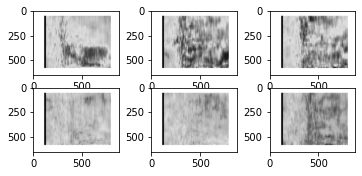

In [4]:
# plot first few images
for index, i in enumerate([1 ,2 ,3 , 800,801,802]):
    # define subplot
    plt.subplot(330 + 1 + index)
    # plot raw pixel data
    plt.imshow(images[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [5]:
X= images.reshape((images.shape[0], 656*875))

In [6]:
#X, y = shuffle(x, label, random_state=0)
num_classes =2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle =True,random_state=8)

In [7]:
# convert from integers to floats
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')
# normalize to range 0-1
X_train = train_norm / 255.0
X_test = test_norm / 255.0

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [14]:
pca=PCA(0.90)  
pca.fit(X_train)  
print('Number of components to explain 90% Variance is',pca.n_components_)

Number of components to explain 90% Variance is 43


In [10]:
# pca.fit(X_train)

In [11]:
# pca.n_components_

In [12]:
train_img_pca = pca.transform(X_train)
test_img_pca = pca.transform(X_test)

In [13]:
inputs = np.concatenate((train_img_pca, test_img_pca), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [13]:
def draw_learning_curve(classifier,title):
    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, valid_scores = learning_curve(classifier, inputs, targets, cv=5)
#     print(train_scores)
#     print(valid_scores)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(valid_scores, axis=1)
    test_std = np.std(valid_scores, axis=1)
    #
    # Plot the learning curve
    #
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve {}'.format(title))
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    
    plt.show()

In [53]:
#Import svm model
from sklearn import svm
from sklearn.model_selection import cross_val_score
#Create a svm Classifier
clf = svm.SVC(kernel='linear', random_state=42) # Linear Kernel


scores = cross_val_score(clf, inputs, targets, cv=5)
print(scores)
#Train the model using the training sets
clf.fit(train_img_pca, y_train)

[0.95665635 0.92569659 0.91640867 0.9504644  0.91640867]


SVC(kernel='linear', random_state=42)

In [15]:
#Predict the response for test dataset
y_pred = clf.predict(test_img_pca)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy for SVM nomdel is :",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred)) 


labels = ['0.0','1.0']
confusion_matrix(y_test, y_pred, labels=[0,1])

Accuracy for SVM nomdel is : 0.9360824742268041
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95       282
         1.0       0.97      0.87      0.92       203

    accuracy                           0.94       485
   macro avg       0.94      0.93      0.93       485
weighted avg       0.94      0.94      0.94       485



array([[277,   5],
       [ 26, 177]], dtype=int64)

In [16]:

# draw_learning_curve(svm.SVC(kernel='linear'))

In [17]:
## KNN
import numpy as np
from sklearn.model_selection import train_test_split
import random
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier

In [18]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_img_pca, y_train)

y_pred = neigh.predict(test_img_pca)

print('KNN score :',neigh.score(test_img_pca,y_test)) 

print(classification_report(y_test, y_pred)) 

KNN score : 0.8824742268041237
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       282
         1.0       0.91      0.79      0.85       203

    accuracy                           0.88       485
   macro avg       0.89      0.87      0.88       485
weighted avg       0.89      0.88      0.88       485



In [19]:
# draw_learning_curve(KNeighborsClassifier(n_neighbors=3))

In [20]:
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[267,  15],
       [ 42, 161]], dtype=int64)

In [21]:
## MLP

clf = MLPClassifier(random_state=1, max_iter=300).fit(train_img_pca, y_train)

y_pred = clf.predict(test_img_pca)

print('MLP score :',clf.score(test_img_pca,y_test)) 

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred, labels=[0,1])

MLP score : 0.9381443298969072
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       282
         1.0       0.93      0.92      0.93       203

    accuracy                           0.94       485
   macro avg       0.94      0.94      0.94       485
weighted avg       0.94      0.94      0.94       485



array([[269,  13],
       [ 17, 186]], dtype=int64)

In [22]:
# draw_learning_curve(MLPClassifier(random_state=1, max_iter=300))

In [23]:
# Random forest

In [24]:
# random forest

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# # Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 20)
# # Train the model on training data
rf.fit(train_img_pca, y_train);

y_pred = rf.predict(test_img_pca)
score = rf.score(test_img_pca, y_test)
print("Accuracy for Randon forest model is :" , score)

Accuracy for Randon forest model is : 0.7077935576284806


In [25]:

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1', solver='liblinear', C=10,random_state=0).fit(train_img_pca, y_train)
y_pred = clf.predict(test_img_pca)
print('Logistic Regression score :',clf.score(test_img_pca,y_test)) 
# draw_learning_curve(LogisticRegression(penalty='l1', solver='liblinear', C=10,random_state=0))

Logistic Regression score : 0.931958762886598


In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

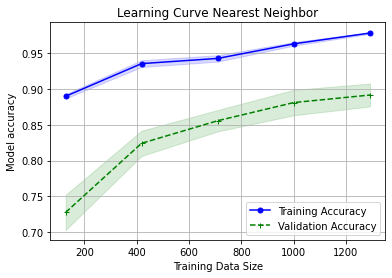

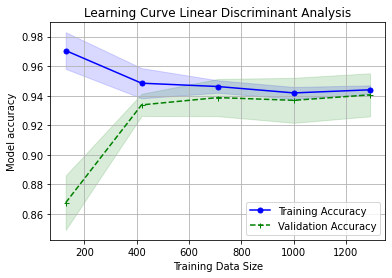

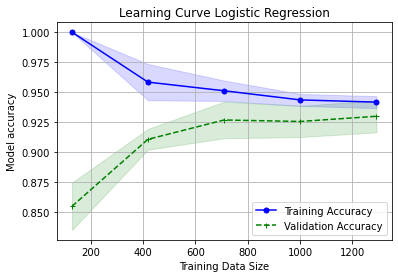

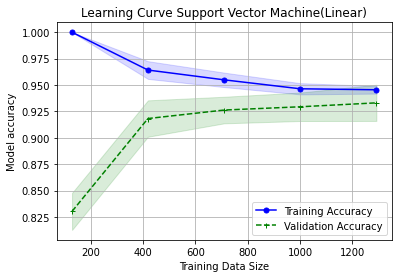

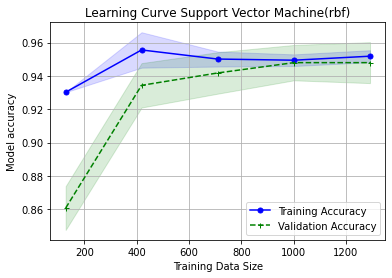

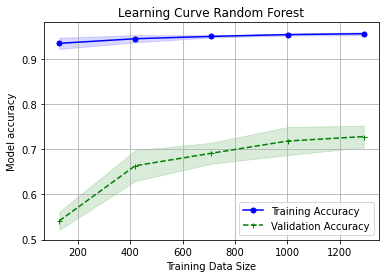

,Classifier,Accuracy Scores,Training Time,Prediction Time
0,3-Nearest Neighbors,0.882474,2.046765,0.043882
1,Linear Discriminant Analysis,0.940206,2.605169,0.000997
2,Logistic Regression,0.931959,3.895842,0.000000
3,Support Vector Machine(Linear),0.936082,42.994426,0.003983
4,Support Vector Machine(rbf),0.946392,44.889676,0.029920
5,Random Forest Classifier,0.735561,51.119561,0.002992


In [28]:
classifiers = [(KNeighborsClassifier(n_neighbors = 3), "Nearest Neighbor"),
               (LinearDiscriminantAnalysis(), "Linear Discriminant Analysis"),
               (LogisticRegression(), "Logistic Regression"),
               (SVC(kernel = "linear", C = 1), "Support Vector Machine(Linear)"),
               (SVC(kernel = "rbf", C = 1), "Support Vector Machine(rbf)"),
                (RandomForestRegressor(n_estimators = 20), "Random Forest")]
                
scores = []
test_time =[]
training_time =[]
start_time =time.time()
for clf, name in classifiers:
    draw_learning_curve(clf,name)
    clf.fit(train_img_pca, y_train)
    training_time1 = time.time() - start_time
    training_time.append(training_time1)
    scores.append(clf.score(test_img_pca,y_test))
    test_time1 = time.time() - start_time-training_time1
    test_time.append(test_time1)

frame = {'Classifier':['3-Nearest Neighbors','Linear Discriminant Analysis','Logistic Regression','Support Vector Machine(Linear)',
                       'Support Vector Machine(rbf)','Random Forest Classifier'],
         'Accuracy Scores':scores, 'Training Time':training_time,'Prediction Time':test_time}
data =pd.DataFrame(data = frame)
data

,Classifier,Accuracy Scores
0,3-Nearest Neighbors,0.882474
1,Linear Discriminant Analysis,0.940206
2,Logistic Regression,0.931959
3,Random Forest,0.917526


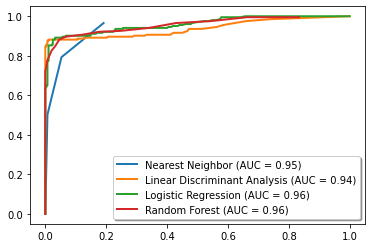

In [29]:
classifiers = [(KNeighborsClassifier(n_neighbors = 3), "Nearest Neighbor"),
               (LinearDiscriminantAnalysis(), "Linear Discriminant Analysis"),
               (LogisticRegression(), "Logistic Regression"),
                (RandomForestClassifier(n_estimators = 20), "Random Forest")]
                
scores = []
for clf, name in classifiers:
    clf.fit(train_img_pca, y_train)
    ROC = []
    for gamma in np.linspace(0, 1, 1130):
        err1 = np.count_nonzero(clf.predict_proba(test_img_pca[y_test == 0, :])[:,1] <= gamma)
        err2 = np.count_nonzero(clf.predict_proba(test_img_pca[y_test == 1, :])[:,1] > gamma)
        err1 = float(err1) / np.count_nonzero(y_test == 0)
        err2 = float(err2) / np.count_nonzero(y_test == 1)
        ROC.append([err1, err2])
    ROC = np.array(ROC)
    ROC = ROC[::-1, :]
    scores.append(clf.score(test_img_pca,y_test))
    auc = roc_auc_score(y_test, clf.predict_proba(test_img_pca)[:,1])
    plt.plot(1-ROC[:, 0], ROC[:, 1], linewidth = 2, label="%s (AUC = %.2f)" % (name, auc))
    plt.legend(loc = 'lower right',shadow = True, fontsize = 'medium')

frame = {'Classifier':['3-Nearest Neighbors','Linear Discriminant Analysis','Logistic Regression','Random Forest'],
         'Accuracy Scores':scores}
data =pd.DataFrame(data = frame)
data